# Project: Graph of Hourly Temperature in Birmingham, UK

In [15]:
# Standard imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime
import requests
%matplotlib inline


## Get Data

Data source: Open-Meteo (https://open-meteo.com/). Generated using Copernicus Climate Change Service information (2022). ERA5 data: Hersbach et al. (2018), doi: 10.24381/cds.adbb2d47. ERA5-Land data: Muñoz Sabater (2019), doi: 10.24381/cds.e2161bac. CERRA data: Schimanke et al. (accessed 2022-12-31), doi: 10.24381/cds.622a565a.


In [2]:
weather_api_url = "https://archive-api.open-meteo.com/v1/archive?latitude=52.48&longitude=-1.90&start_date=2019-03-18&end_date=2023-03-18&hourly=temperature_2m&daily=temperature_2m_max&timezone=Europe%2FLondon"

response = requests.get(weather_api_url)

if response.status_code == 200:
    weather_data = response.json()
    print(weather_data.keys())
else:
    print(f"Error: {response.status_code}")

dict_keys(['latitude', 'longitude', 'generationtime_ms', 'utc_offset_seconds', 'timezone', 'timezone_abbreviation', 'elevation', 'hourly_units', 'hourly', 'daily_units', 'daily'])


## Clean and organize dataframe

In [3]:
for key, value in weather_data.items():
    print(f"{key}: type: {type(value)}")

latitude: type: <class 'float'>
longitude: type: <class 'float'>
generationtime_ms: type: <class 'float'>
utc_offset_seconds: type: <class 'int'>
timezone: type: <class 'str'>
timezone_abbreviation: type: <class 'str'>
elevation: type: <class 'float'>
hourly_units: type: <class 'dict'>
hourly: type: <class 'dict'>
daily_units: type: <class 'dict'>
daily: type: <class 'dict'>


In [4]:
hourly_units = weather_data['hourly_units']
hourly_data = weather_data['hourly']

print("Hourly Units:")
for key, value in hourly_units.items():
    print(f"{key}: {value}")

print("\nHourly Data:")
for key, value in hourly_data.items():
    print(f"{key}: {value}")


Hourly Units:
time: iso8601
temperature_2m: °C

Hourly Data:
time: ['2019-03-18T00:00', '2019-03-18T01:00', '2019-03-18T02:00', '2019-03-18T03:00', '2019-03-18T04:00', '2019-03-18T05:00', '2019-03-18T06:00', '2019-03-18T07:00', '2019-03-18T08:00', '2019-03-18T09:00', '2019-03-18T10:00', '2019-03-18T11:00', '2019-03-18T12:00', '2019-03-18T13:00', '2019-03-18T14:00', '2019-03-18T15:00', '2019-03-18T16:00', '2019-03-18T17:00', '2019-03-18T18:00', '2019-03-18T19:00', '2019-03-18T20:00', '2019-03-18T21:00', '2019-03-18T22:00', '2019-03-18T23:00', '2019-03-19T00:00', '2019-03-19T01:00', '2019-03-19T02:00', '2019-03-19T03:00', '2019-03-19T04:00', '2019-03-19T05:00', '2019-03-19T06:00', '2019-03-19T07:00', '2019-03-19T08:00', '2019-03-19T09:00', '2019-03-19T10:00', '2019-03-19T11:00', '2019-03-19T12:00', '2019-03-19T13:00', '2019-03-19T14:00', '2019-03-19T15:00', '2019-03-19T16:00', '2019-03-19T17:00', '2019-03-19T18:00', '2019-03-19T19:00', '2019-03-19T20:00', '2019-03-19T21:00', '2019-03-19T

In [5]:
hourly_units.keys()

dict_keys(['time', 'temperature_2m'])

In [6]:
time_format = "%Y-%m-%dT%H:%M"
time_data = [datetime.strptime(time_str, time_format) for time_str in hourly_data['time']]


In [7]:
len(time_data)

35088

In [8]:
# Figure out the date range

min_date = min(time_data)
max_date = max(time_data)
date_range = f"{min_date.strftime('%Y-%m-%d')} to {max_date.strftime('%Y-%m-%d')}"
temperature_data = hourly_data['temperature_2m']

In [9]:
filtered_time_data, filtered_temperature_data = zip(*[(t, temp) for t, temp in zip(time_data, temperature_data) if temp is not None])

max_temperature_index, max_temperature = max(enumerate(filtered_temperature_data), key=lambda x: x[1])
max_temperature_time = filtered_time_data[max_temperature_index]



In [10]:
title = f'Hourly Temperature in Birmingham, UK'
title

'Hourly Temperature in Birmingham, UK'

## Graph the data

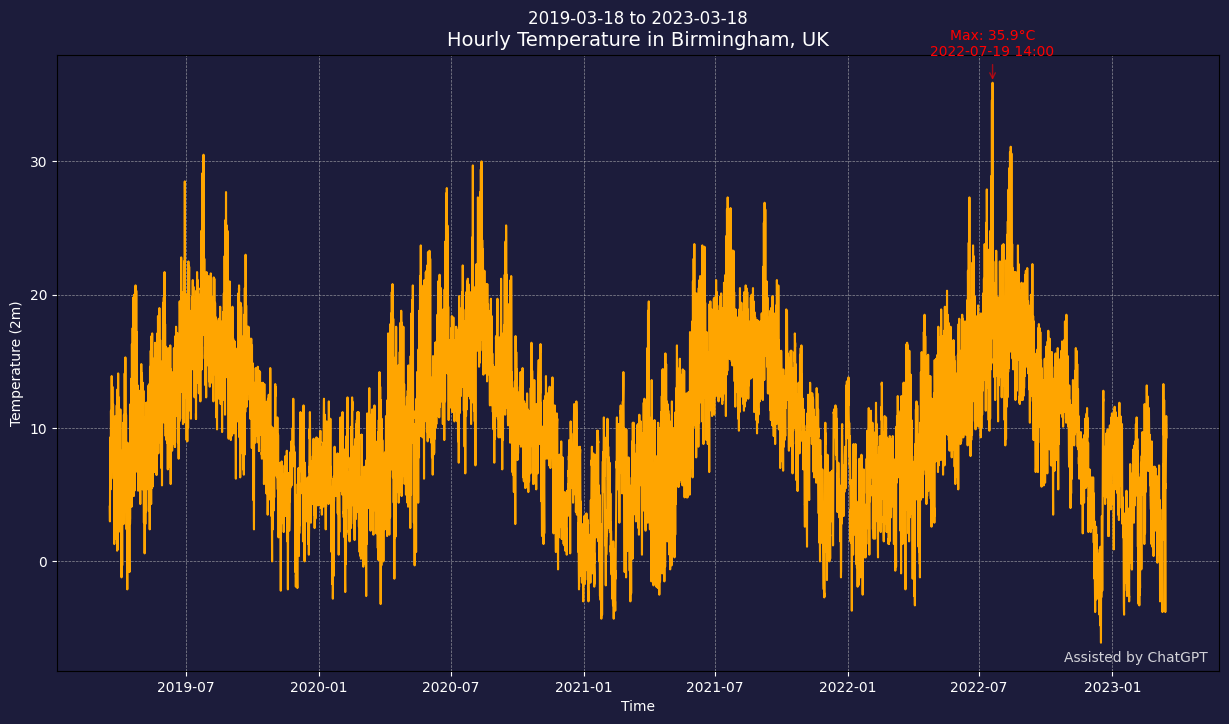

In [14]:
fig, ax = plt.subplots(figsize=(15, 8))


ax.plot(time_data, temperature_data, color='#FFA500')

ax.set_xlabel('Time', color='white')
ax.set_ylabel('Temperature (2m)', color='white')

ax.set_title(title, color='white', fontsize=14)
ax.text(0.5, 1.05, date_range, horizontalalignment='center', fontsize=12, color='white', transform=ax.transAxes)

ax.tick_params(colors='white')

ax.set_facecolor('#1C1C3B')  # Set the background color of the plot area
fig.set_facecolor('#1C1C3B')  # Set the background color of the area surrounding the plot
ax.grid(True, color='#BFBFBF', linestyle='--', linewidth=0.5, alpha=0.7)  # Customize the grid color, style, and transparency


ax.annotate(
    f'Max: {max_temperature:.1f}°C\n{max_temperature_time.strftime("%Y-%m-%d %H:%M")}',
    xy=(max_temperature_time, max_temperature),
    xytext=(max_temperature_time, max_temperature + 2),
    color='red',
    arrowprops=dict(facecolor='red', edgecolor='red', alpha=0.6, lw=1, arrowstyle='->'),
    fontsize=10,
    ha='center'
)

credit_string = "Assisted by ChatGPT"
ax.text(0.99, 0.01, credit_string, fontsize=10, color='white', ha='right', va='bottom', transform=ax.transAxes, alpha=0.8)


plt.show()


## Conclusions


The data shows just how extreem this last year's weather has been.